## This is the Submission of Data Wrangling Team Project - Group 1 - Part 2
### Topic: Inspecting, Cleaning and Re-structuring of the eCommerce1c Dataset for the Statistical Analysis and Modelling.
### This is a continutaion of Df4 (saved as eCommerceDataset1_Group1_r01.csv), for indepth cleaning and Data Enrichment.

In [4]:
## setting up - import the necessary packages ##
import os
#import cv2
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import missingno as missno
from matplotlib import rcParams
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from matplotlib import cm
#from pandas_profiling import ProfileReport
os.getcwd()

# Change directory # C:\Users\louis\My Python Coding Space\Advanced python Course Codes # "C:\Users\louis\M5 DW Code"
os.chdir('C:\\Users\\wooo_\\OneDrive\\Desktop\\SUTD Notes\\Data Wrangling with Programming\\Group Project\\Large Dataset (Group1)')

### Reading the Df5 from eCommerceDataset1_Group1_r01.csv file

In [5]:
## Read the eCommerce Dataset

Df5 = pd.read_csv("eCommerceDataset1_Group1_r01.csv", header=0) 

print(Df5)

C:\Users\wooo_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


        item_id    status  created_at  \
0        211131  complete    7/1/2016   
1        211133  canceled    7/1/2016   
2        324257  canceled  11/25/2016   
3        211134  canceled    7/1/2016   
4        473369  complete   5/19/2017   
...         ...       ...         ...   
582227   904365  received   8/25/2018   
582228   904607  canceled   8/26/2018   
582229   904608  canceled   8/26/2018   
582230   904796  canceled   8/27/2018   
582231   904987    holded   8/27/2018   

                                                      sku  price_usd  \
0                                       kreations_YI 06-L      11.63   
1       kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...       1.43   
2                                     RS_Habshi Halwa Tin       1.61   
3                                      Ego_UP0017-999-MR0      14.62   
4                                               BT_BT-422       3.16   
...                                                   ...        ...   
582

# Inspecting the dataset

In [9]:
print(Df5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582232 entries, 0 to 582231
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                582232 non-null  int64  
 1   status                 582218 non-null  object 
 2   created_at             582232 non-null  object 
 3   sku                    582229 non-null  object 
 4   price_usd              582232 non-null  float64
 5   qty_ordered            582232 non-null  int64  
 6   increment_id           582232 non-null  object 
 7   category_name_1        582068 non-null  object 
 8   sales_commission_code  445921 non-null  object 
 9   adj_usd                582232 non-null  float64
 10  payment_method         582232 non-null  object 
 11  Working_Date           582232 non-null  object 
 12  B_Status               582232 non-null  object 
 13  Year                   582232 non-null  int64  
 14  Month                  582232 non-nu

## Finding the Number of Unique Records in the Dataset (Find the Unique ID)

### Number of unique Country (This was cleaned in Part 1): 

In [10]:
country_count = []

cnt = 0

for i in range(0, len(Df5['Country'])):
    
    if Df5['Country'][i] not in country_count: 
        
        country_count.append(Df5['Country'][i])
          
        cnt += 1

print("No of unique Country :", cnt)
  
print("The unique Countries are :", country_count)


No of unique Country : 35
The unique Countries are : ['Australia', 'Denmark', 'Ireland', 'Unspecified', 'Finland', 'Lebanon', 'Lithuania', 'Malta', 'Netherlands', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States', 'Saudi Arabia', 'Singapore', 'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czechia', 'France', 'Germany', 'Greece', 'Iceland', 'Israel', 'Spain', 'Italy', 'Japan', 'Norway', 'Poland', 'Portugal', 'Sweden', 'Austria', 'Bahrain', 'Belgium']


### Number of unique CustomerID - No of the unique CustomerID: 115,081 @ Df5:

In [12]:
customerID_count = []

cnt = 0

for i in range(0, len(Df5['Customer_ID'])):
    
    if Df5['Customer_ID'][i] not in customerID_count: 
        
        customerID_count.append(Df5['Customer_ID'][i])
          
        cnt += 1

print("No of unique CustomerID:", cnt)
  
# print("The unique CustomerIDs are:", customerID_count)  

No of unique CustomerID: 115081


### The Customer_ID should be converted into integer rather that a float.

### Coverting 'Customer_ID' into a interger ==> Df6

In [13]:
Df6 = Df5

Df6['Customer_ID'] = Df6['Customer_ID'].apply(np.int64)

print(Df6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582232 entries, 0 to 582231
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                582232 non-null  int64  
 1   status                 582218 non-null  object 
 2   created_at             582232 non-null  object 
 3   sku                    582229 non-null  object 
 4   price_usd              582232 non-null  float64
 5   qty_ordered            582232 non-null  int64  
 6   increment_id           582232 non-null  object 
 7   category_name_1        582068 non-null  object 
 8   sales_commission_code  445921 non-null  object 
 9   adj_usd                582232 non-null  float64
 10  payment_method         582232 non-null  object 
 11  Working_Date           582232 non-null  object 
 12  B_Status               582232 non-null  object 
 13  Year                   582232 non-null  int64  
 14  Month                  582232 non-nu

### "Customer ID" is now an integer in Df6, no change of Noumber of Customers, same 115,081

In [14]:
customerID_count = []

cnt = 0

for i in range(0, len(Df6['Customer_ID'])):
    
    if Df6['Customer_ID'][i] not in customerID_count: 
        
        customerID_count.append(Df6['Customer_ID'][i])
          
        cnt += 1
  
print("No of unique CustomerID:", cnt)
  
# print("The unique CustomerIDs are:", customerID_count)

No of unique CustomerID: 115081


### Number of the unique category_name_1: 17 and dropping nan

### No of unique category name: 17 @ Df6

In [15]:

category_name_1_count = []

cnt = 0

for i in range(0, len(Df6['category_name_1'])):
    
    if Df6['category_name_1'][i] not in category_name_1_count: 
        
        category_name_1_count.append(Df6['category_name_1'][i])
          
        cnt += 1
  
print("No of unique category name:", cnt)
  
print("The unique category names are:", category_name_1_count)  

No of unique category name: 17
The unique category names are: ["Women's Fashion", 'Beauty & Grooming', 'Soghaat', "Men's Fashion", 'Mobiles & Tablets', 'Superstore', 'Appliances', 'Entertainment', '\\N', 'Others', 'Computing', 'Home & Living', 'Health & Sports', 'School & Education', 'Kids & Baby', 'Books', nan]


In [16]:
print(Df6)

        item_id    status  created_at  \
0        211131  complete    7/1/2016   
1        211133  canceled    7/1/2016   
2        324257  canceled  11/25/2016   
3        211134  canceled    7/1/2016   
4        473369  complete   5/19/2017   
...         ...       ...         ...   
582227   904365  received   8/25/2018   
582228   904607  canceled   8/26/2018   
582229   904608  canceled   8/26/2018   
582230   904796  canceled   8/27/2018   
582231   904987    holded   8/27/2018   

                                                      sku  price_usd  \
0                                       kreations_YI 06-L      11.63   
1       kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...       1.43   
2                                     RS_Habshi Halwa Tin       1.61   
3                                      Ego_UP0017-999-MR0      14.62   
4                                               BT_BT-422       3.16   
...                                                   ...        ...   
582

### Droppingthe nan.....at Category (category_name_1) ==> Df7:

In [17]:
import pandas as pd


# under certain label
Df7 = Df6.dropna(subset=['category_name_1'])
 
# Resetting the indices using df.reset_index()
Df7 = Df7.reset_index(drop=True)
 
Df7

,item_id,status,created_at,sku,price_usd,qty_ordered,increment_id,category_name_1,sales_commission_code,adj_usd,...,B_Status,Year,Month,Customer_Since,M-Y,FY,Customer_ID,Country,ISO_code,Regions
0,211131,complete,7/1/2016,kreations_YI 06-L,11.63,1,100147443,Women's Fashion,\N,0.0,...,Valid,2016,7,2016-7,Jul-16,FY17,1,Australia,AUS,Oceania
1,211133,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,1.43,1,100147444,Beauty & Grooming,\N,0.0,...,Gross,2016,7,2016-7,Jul-16,FY17,2,Australia,AUS,Oceania
2,324257,canceled,11/25/2016,RS_Habshi Halwa Tin,1.61,1,100222998,Soghaat,\N,0.0,...,Gross,2016,11,2016-7,Nov-16,FY17,2,Australia,AUS,Oceania
3,211134,canceled,7/1/2016,Ego_UP0017-999-MR0,14.62,1,100147445,Women's Fashion,\N,0.0,...,Gross,2016,7,2016-7,Jul-16,FY17,3,Australia,AUS,Oceania
4,473369,complete,5/19/2017,BT_BT-422,3.16,1,100306394,Men's Fashion,\N,0.0,...,Net,2017,5,2016-7,May-17,FY17,3,Australia,AUS,Oceania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582063,904365,received,8/25/2018,HASQAR5A744999A7B52,0.79,1,100561921,Health & Sports,NaN,0.0,...,Valid,2018,8,2018-8,Aug-18,FY19,115185,Belgium,BEL,Europe
582064,904607,canceled,8/26/2018,BAGTRA5A0C12CBAC37B,5.37,1,100562045,Beauty & Grooming,NaN,0.0,...,Gross,2018,8,2018-8,Aug-18,FY19,115222,Belgium,BEL,Europe
582065,904608,canceled,8/26/2018,BAGROM5AAF9D112383E,5.96,1,100562045,Beauty & Grooming,NaN,0.0,...,Gross,2018,8,2018-8,Aug-18,FY19,115222,Belgium,BEL,Europe
582066,904796,canceled,8/27/2018,MATNOK5B2B7E715DF70,29.83,1,100562160,Mobiles & Tablets,NaN,0.0,...,Gross,2018,8,2018-8,Aug-18,FY19,115259,Belgium,BEL,Europe


In [18]:
print(Df7)

        item_id    status  created_at  \
0        211131  complete    7/1/2016   
1        211133  canceled    7/1/2016   
2        324257  canceled  11/25/2016   
3        211134  canceled    7/1/2016   
4        473369  complete   5/19/2017   
...         ...       ...         ...   
582063   904365  received   8/25/2018   
582064   904607  canceled   8/26/2018   
582065   904608  canceled   8/26/2018   
582066   904796  canceled   8/27/2018   
582067   904987    holded   8/27/2018   

                                                      sku  price_usd  \
0                                       kreations_YI 06-L      11.63   
1       kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...       1.43   
2                                     RS_Habshi Halwa Tin       1.61   
3                                      Ego_UP0017-999-MR0      14.62   
4                                               BT_BT-422       3.16   
...                                                   ...        ...   
582

In [19]:
print(Df7.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582068 entries, 0 to 582067
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                582068 non-null  int64  
 1   status                 582054 non-null  object 
 2   created_at             582068 non-null  object 
 3   sku                    582065 non-null  object 
 4   price_usd              582068 non-null  float64
 5   qty_ordered            582068 non-null  int64  
 6   increment_id           582068 non-null  object 
 7   category_name_1        582068 non-null  object 
 8   sales_commission_code  445921 non-null  object 
 9   adj_usd                582068 non-null  float64
 10  payment_method         582068 non-null  object 
 11  Working_Date           582068 non-null  object 
 12  B_Status               582068 non-null  object 
 13  Year                   582068 non-null  int64  
 14  Month                  582068 non-nu

In [20]:

category_name_1_count = []

cnt = 0

for i in range(0, len(Df7['category_name_1'])):
    
    if Df7['category_name_1'][i] not in category_name_1_count: 
        
        category_name_1_count.append(Df7['category_name_1'][i])
          
        cnt += 1
  
print("No of unique category name:", cnt)
  
print("The unique category names are:", category_name_1_count)  

No of unique category name: 16
The unique category names are: ["Women's Fashion", 'Beauty & Grooming', 'Soghaat', "Men's Fashion", 'Mobiles & Tablets', 'Superstore', 'Appliances', 'Entertainment', '\\N', 'Others', 'Computing', 'Home & Living', 'Health & Sports', 'School & Education', 'Kids & Baby', 'Books']


### The "nan" in 'category_name_1' were all removed ==> Df7.

### The unique sku found is: 84,514 @ Df7

In [21]:
sku_count = []

cnt = 0

for i in range(0, len(Df7['sku'])):
    
    if Df7['sku'][i] not in sku_count: 
        
        sku_count.append(Df7['sku'][i])
          
        cnt += 1
  
print("No of unique sku:", cnt)
  
# print("The unique sku:", sku_count)

No of unique sku: 84514


## The unique item_id is: 582,068 (same as total number of rows) - So could be just a running number
### Note: it toke almost an hours to run below code.

In [23]:
## Do not run - it take a long time..... to sort 500K records.

item_id_count = []

cnt = 0

for i in range(0, len(Df7['item_id'])):
    
    if Df7['item_id'][i] not in item_id_count: 
        
        item_id_count.append(Df7['item_id'][i])
          
        cnt += 1

print("No of unique item_id:", cnt)
  
# print("The unique item_id:", item_id_count)

No of unique item_id: 582068


## Creating a new Column on Sales (item_sales = qty_ordered * price_usd)
### Additional Column, item_sales is created (Enhanced current dataset).

In [24]:
Df7["Item_sales"] = Df7["qty_ordered"] * Df7["price_usd"] 

print(Df7.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582068 entries, 0 to 582067
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                582068 non-null  int64  
 1   status                 582054 non-null  object 
 2   created_at             582068 non-null  object 
 3   sku                    582065 non-null  object 
 4   price_usd              582068 non-null  float64
 5   qty_ordered            582068 non-null  int64  
 6   increment_id           582068 non-null  object 
 7   category_name_1        582068 non-null  object 
 8   sales_commission_code  445921 non-null  object 
 9   adj_usd                582068 non-null  float64
 10  payment_method         582068 non-null  object 
 11  Working_Date           582068 non-null  object 
 12  B_Status               582068 non-null  object 
 13  Year                   582068 non-null  int64  
 14  Month                  582068 non-nu

## Create a final dataset for analysis

In [25]:
Df8 = Df7[["item_id", "status", "created_at", "Customer_ID", "Country", "Regions", "sku", "category_name_1", "qty_ordered", "price_usd", "Item_sales"]].copy()

print(Df8)

        item_id    status  created_at  Customer_ID    Country  Regions  \
0        211131  complete    7/1/2016            1  Australia  Oceania   
1        211133  canceled    7/1/2016            2  Australia  Oceania   
2        324257  canceled  11/25/2016            2  Australia  Oceania   
3        211134  canceled    7/1/2016            3  Australia  Oceania   
4        473369  complete   5/19/2017            3  Australia  Oceania   
...         ...       ...         ...          ...        ...      ...   
582063   904365  received   8/25/2018       115185    Belgium   Europe   
582064   904607  canceled   8/26/2018       115222    Belgium   Europe   
582065   904608  canceled   8/26/2018       115222    Belgium   Europe   
582066   904796  canceled   8/27/2018       115259    Belgium   Europe   
582067   904987    holded   8/27/2018       115296    Belgium   Europe   

                                                      sku    category_name_1  \
0                              

In [26]:
Df8 = Df8.rename({"status":"order_status", "created_at":"date", "sku":"product_description", "category_name_1":"product_category", "qty_ordered":"quantity", "price_usd":"unit_price", "Item_sales":"sales"}, axis=1)

Df8

,item_id,order_status,date,Customer_ID,Country,Regions,product_description,product_category,quantity,unit_price,sales
0,211131,complete,7/1/2016,1,Australia,Oceania,kreations_YI 06-L,Women's Fashion,1,11.63,11.63
1,211133,canceled,7/1/2016,2,Australia,Oceania,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,Beauty & Grooming,1,1.43,1.43
2,324257,canceled,11/25/2016,2,Australia,Oceania,RS_Habshi Halwa Tin,Soghaat,1,1.61,1.61
3,211134,canceled,7/1/2016,3,Australia,Oceania,Ego_UP0017-999-MR0,Women's Fashion,1,14.62,14.62
4,473369,complete,5/19/2017,3,Australia,Oceania,BT_BT-422,Men's Fashion,1,3.16,3.16
...,...,...,...,...,...,...,...,...,...,...,...
582063,904365,received,8/25/2018,115185,Belgium,Europe,HASQAR5A744999A7B52,Health & Sports,1,0.79,0.79
582064,904607,canceled,8/26/2018,115222,Belgium,Europe,BAGTRA5A0C12CBAC37B,Beauty & Grooming,1,5.37,5.37
582065,904608,canceled,8/26/2018,115222,Belgium,Europe,BAGROM5AAF9D112383E,Beauty & Grooming,1,5.96,5.96
582066,904796,canceled,8/27/2018,115259,Belgium,Europe,MATNOK5B2B7E715DF70,Mobiles & Tablets,1,29.83,29.83


## The Dataframe is now cleaned, enhanced, re-arranged and is ready to be used for analysis

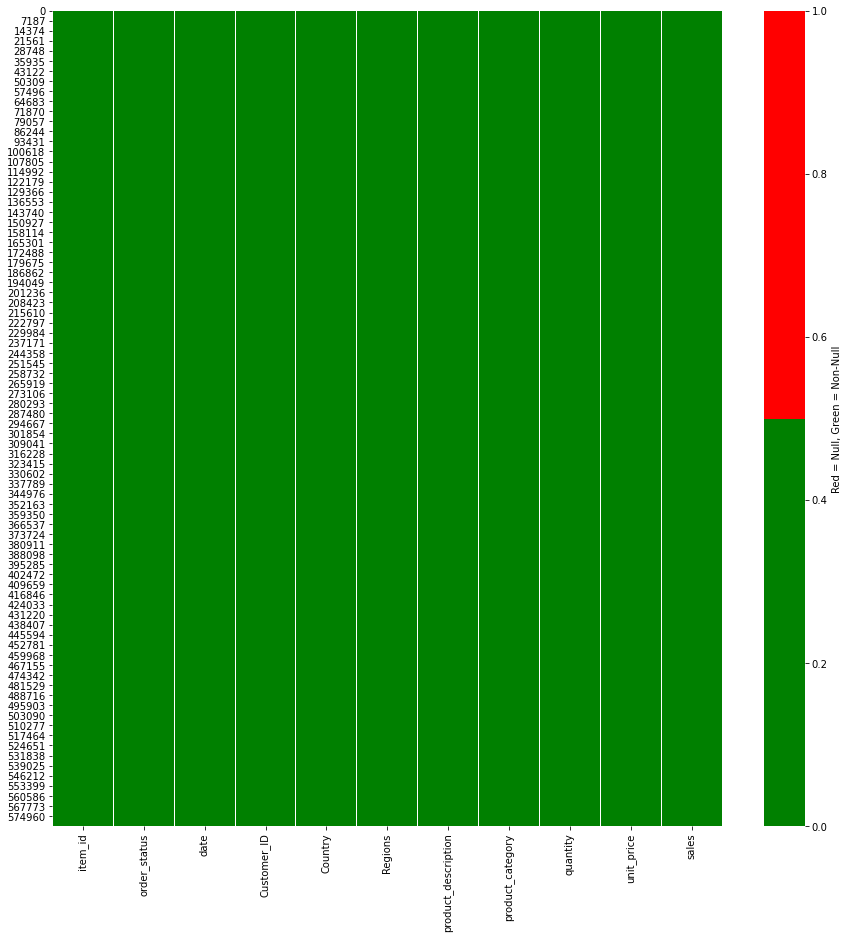

In [27]:
cols = Df8.columns[:12]        
colours = ['green', 'red']      # specify the colours - red is missing. blue is not missing.

plt.subplots(figsize=(15,15))  # magnify the plot size to view the details

sb.heatmap(Df8[cols].isnull(), cmap=sb.color_palette(colours), cbar_kws={'label': 'Red = Null, Green = Non-Null', 'orientation': 'vertical'})
# plotting as heatmap for null values, with colormap following your specified colors, set cbar arguments
plt.xticks(rotation=90)
plt.show()

C:\Users\wooo_\anaconda3\lib\site-packages\missingno\missingno.py:265: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


<AxesSubplot:>

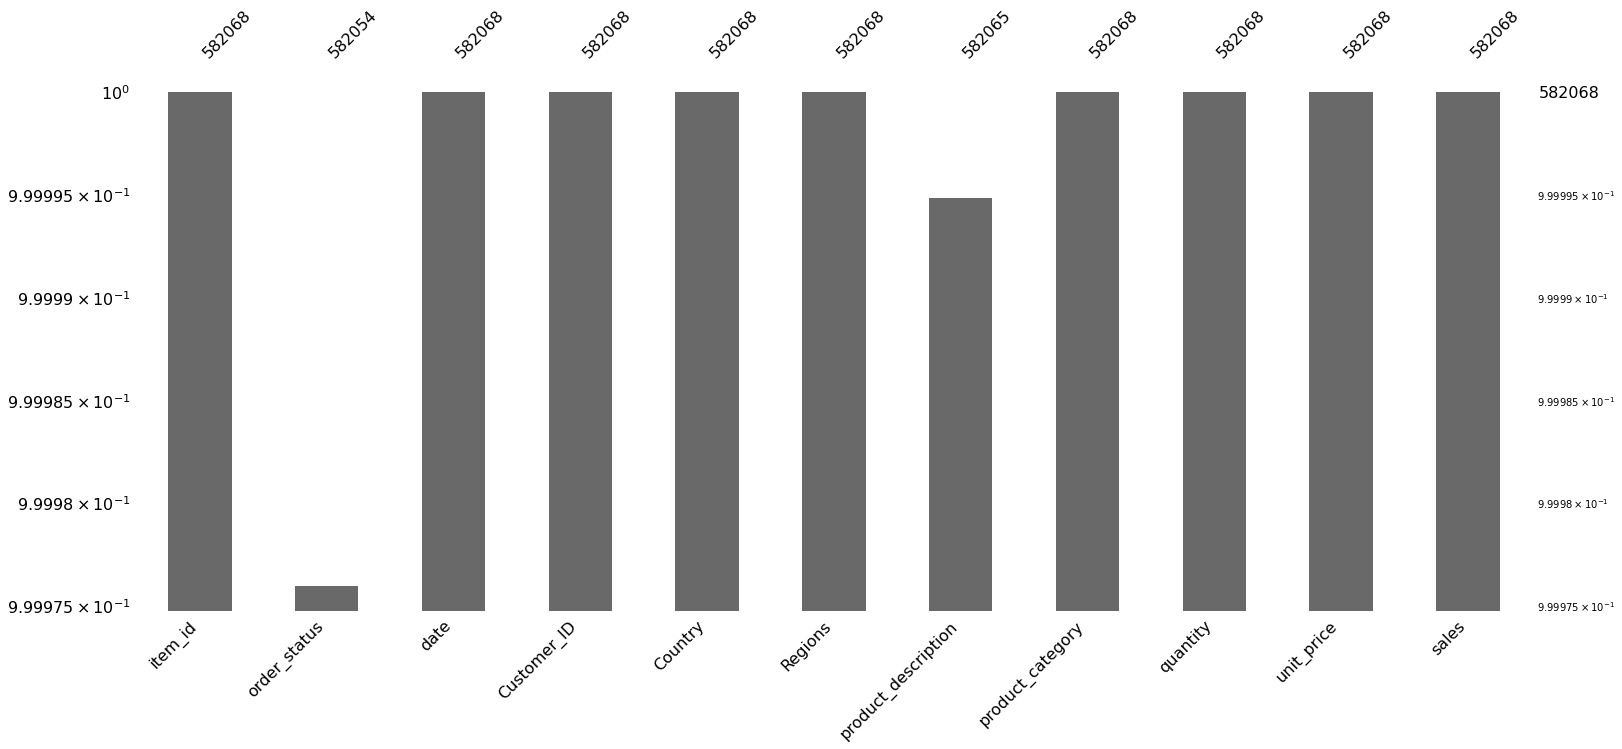

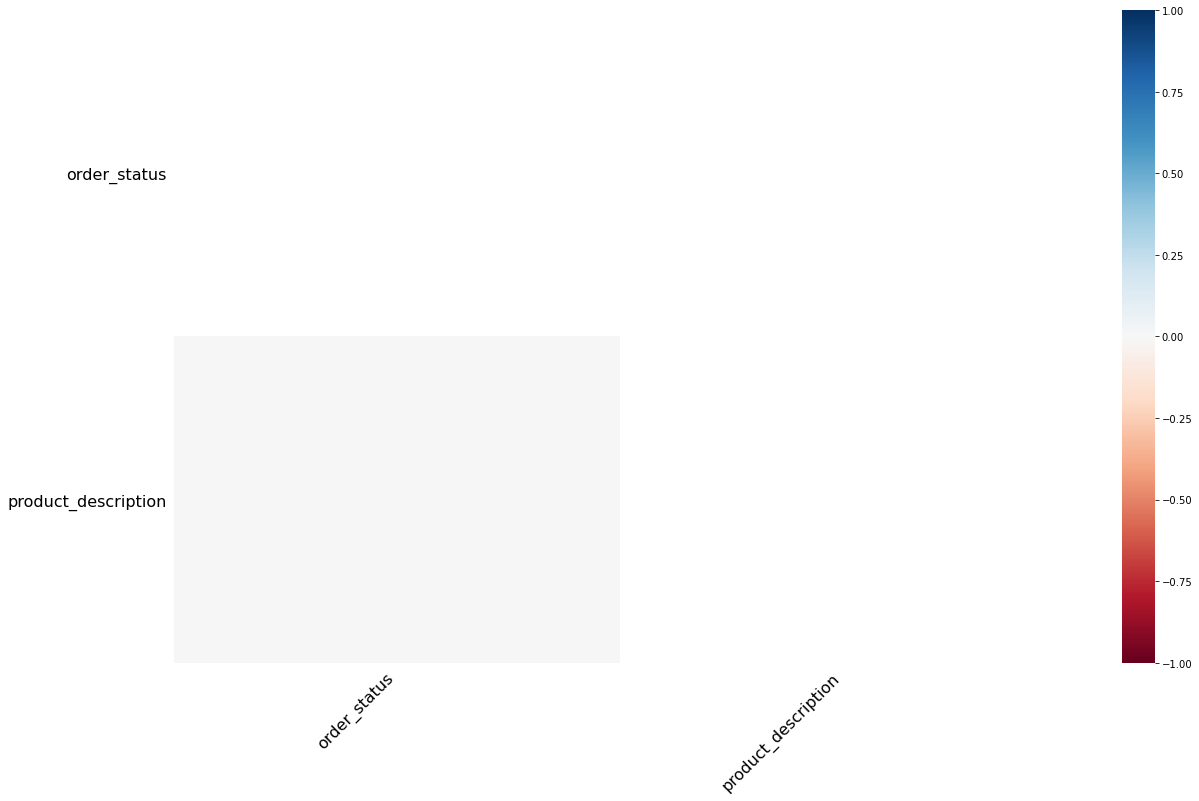

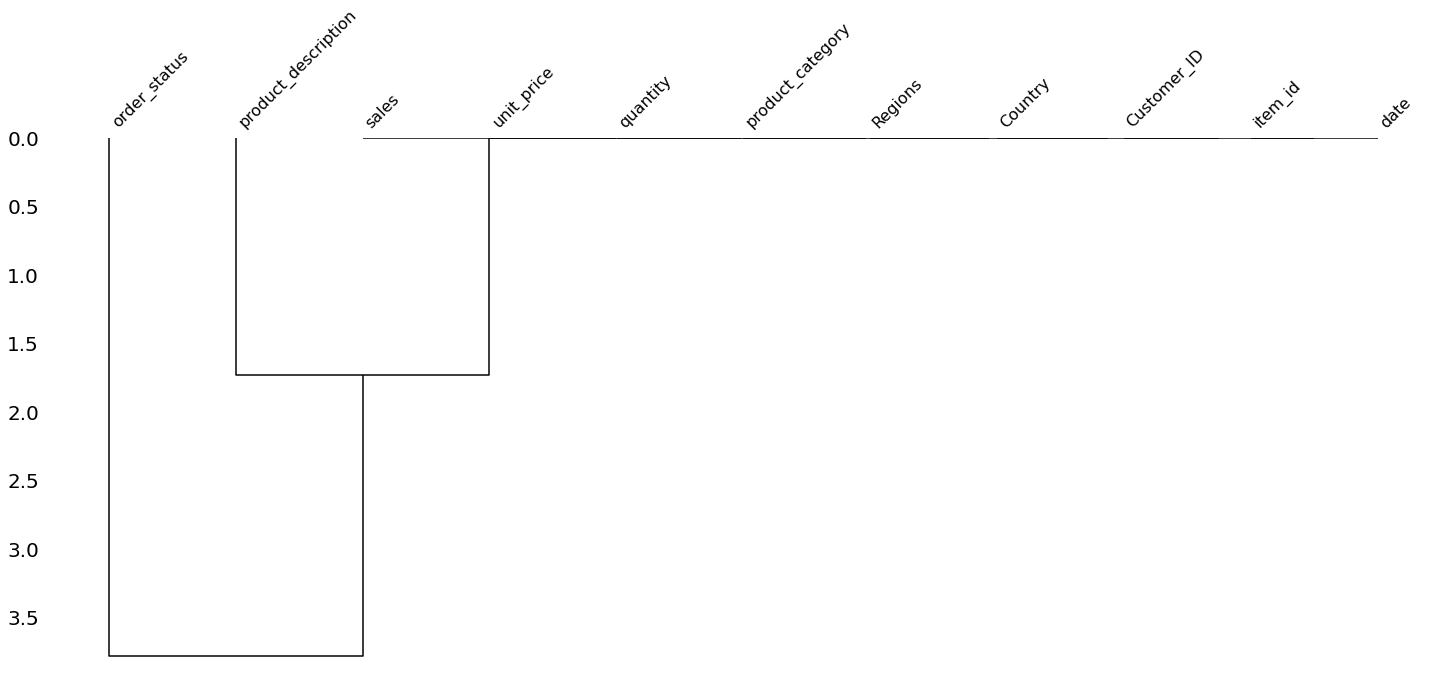

In [28]:
missno.bar(Df8, log=True) 

missno.heatmap(Df8) 

missno.dendrogram(Df8) 

In [29]:

Df8.to_csv('eCommerceAnalysis_Df8_Group1_r01.csv', index=False)

print("Dataframe 8:")
print(Df8)

Dataframe 8:
        item_id order_status        date  Customer_ID    Country  Regions  \
0        211131     complete    7/1/2016            1  Australia  Oceania   
1        211133     canceled    7/1/2016            2  Australia  Oceania   
2        324257     canceled  11/25/2016            2  Australia  Oceania   
3        211134     canceled    7/1/2016            3  Australia  Oceania   
4        473369     complete   5/19/2017            3  Australia  Oceania   
...         ...          ...         ...          ...        ...      ...   
582063   904365     received   8/25/2018       115185    Belgium   Europe   
582064   904607     canceled   8/26/2018       115222    Belgium   Europe   
582065   904608     canceled   8/26/2018       115222    Belgium   Europe   
582066   904796     canceled   8/27/2018       115259    Belgium   Europe   
582067   904987       holded   8/27/2018       115296    Belgium   Europe   

                                      product_description   pr

In [30]:
DfV = pd.read_csv('eCommerceAnalysis_Df8_Group1_r01.csv')

print()
print("DfV = Verification Df: ")
print(DfV)


DfV = Verification Df: 
        item_id order_status        date  Customer_ID    Country  Regions  \
0        211131     complete    7/1/2016            1  Australia  Oceania   
1        211133     canceled    7/1/2016            2  Australia  Oceania   
2        324257     canceled  11/25/2016            2  Australia  Oceania   
3        211134     canceled    7/1/2016            3  Australia  Oceania   
4        473369     complete   5/19/2017            3  Australia  Oceania   
...         ...          ...         ...          ...        ...      ...   
582063   904365     received   8/25/2018       115185    Belgium   Europe   
582064   904607     canceled   8/26/2018       115222    Belgium   Europe   
582065   904608     canceled   8/26/2018       115222    Belgium   Europe   
582066   904796     canceled   8/27/2018       115259    Belgium   Europe   
582067   904987       holded   8/27/2018       115296    Belgium   Europe   

                                      product_desc

## The Df8 saved in the file "eCommerceAnalysis_Df8_Group1_r01.csv" are the same.
### The Df8 has 11 Columns and 582K rows
### End Of Part 2.